<a href="https://colab.research.google.com/github/solharsh/NLP_With_ML/blob/master/Product_Safety_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Problem: 

Amazon Retail receives billions of reviews on its products every year. Some of these reviews indicate a safety issue and a need to potentially suppress the product (ASIN). In these cases, review text is sent to annotation teams worldwide that decide whether there is a product safety issue or not. 

The team responsible for this annotation is looking at a potential Machine Learning solution to automate this process given the extensive dataset created.

## ML Problem:

This is a binary classification problem of using review text, review title, star rating and date information to predict if a product is a Product Safety Issue (1) or Not Product Safety Issue (0). We will be using F1 score as our evaluation metric. 

## Task and Deliverables:

Use your model to predict on the public_test_features and submit to Leaderboard. You can submit as many times to Leaderboard as you like. Each student must individually submit.

## Dataset Description

There are seven features in the dataset, five that are useful. 

    ID: Unique ID created by Leaderboard when splitting the dataset. Numeric
    doc_id: Amazon ID for the review instance. Numeric.
    Text: raw review text as it appeared on the Amazon site. Text.
    date: time stamp for the review. Text.
    star_rating: 0-5. Numeric.
    title: raw review title as it appeared on the Amazon site. Text.
    human_tag: Ground truth if Amazon's human annotators determined if the review was a Product Safety Issue or Not Product Safety Issue. Binary.

In [0]:
#getting more RAM from google colab
a = []
while(1):
    a.append('1')

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
pip install vaderSentiment

In [3]:
pip install contractions

In [4]:
import os
import numpy as np
import pandas as pd
import re
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('averaged_perceptron_tagger')
stopword = nltk.corpus.stopwords.words('english')
from nltk.corpus import stopwords
nltk.download('words')
from nltk.text import Text
import string, re
from sklearn.feature_extraction.text import CountVectorizer
string.punctuation
wn = nltk.WordNetLemmatizer()
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
#nlp = spacy.load('en')
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm_notebook as tqdm
from tqdm import trange
analyzer = SentimentIntensityAnalyzer()
# more common imports
import pandas as pd
import numpy as np
from collections import Counter
import re

# languange processing imports
import nltk
from gensim.corpora import Dictionary
# preprocessing imports
from sklearn.preprocessing import LabelEncoder

# model imports
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.word2vec import Word2Vec
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# hyperparameter training imports
from sklearn.model_selection import GridSearchCV

# visualization imports
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import base64
import io
%matplotlib inline
sns.set()  # defines the style of the plots to be seaborn style

import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import contractions_dict
import unicodedata

nlp = spacy.load('en', parse = False, tag=False, entity=False)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
dataset = pd.read_csv("/content/training.csv")

In [6]:
dataset.head()

,ID,doc_id,text,date,star_rating,title,human_tag
0,47490,15808037321,"I ordered a sample of the Dietspotlight Burn, ...",6/25/2018 17:51,1,DO NOT BUY!,0
1,16127,16042300811,This coffee tasts terrible as if it got burnt ...,2/8/2018 15:59,2,Coffee not good,0
2,51499,16246716471,I've been buying lightly salted Planters cashe...,3/22/2018 17:53,2,"Poor Quality - Burnt, Shriveled Nuts With Blac...",0
3,36725,14460351031,This product is great in so many ways. It goes...,12/7/2017 8:49,4,"Very lovey product, good sunscreen, but strong...",0
4,49041,15509997211,"My skin did not agree with this product, it wo...",3/21/2018 13:51,1,Not for everyone. Reactions can be harsh.,1


In [7]:
dataset.describe()

,ID,doc_id,star_rating,human_tag
count,63134.000000,6.313400e+04,63134.000000,63134.000000
mean,39385.880350,1.538390e+10,2.191054,0.154576
std,22793.375868,1.248762e+09,1.236112,0.361503
min,0.000000,1.421766e+09,1.000000,0.000000
25%,19601.250000,1.458434e+10,1.000000,0.000000
50%,39342.500000,1.557187e+10,2.000000,0.000000
75%,59123.750000,1.625501e+10,3.000000,0.000000
max,78917.000000,1.812219e+10,5.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63134 entries, 0 to 63133
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           63134 non-null  int64 
 1   doc_id       63134 non-null  int64 
 2   text         63128 non-null  object
 3   date         63134 non-null  object
 4   star_rating  63134 non-null  int64 
 5   title        63133 non-null  object
 6   human_tag    63134 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 3.4+ MB


In [9]:
dataset['new_text'] = dataset[['text','title']].apply(lambda x: ':'.join(str(s) for s in x), axis=1)
dataset.head()

,ID,doc_id,text,date,star_rating,title,human_tag,new_text
0,47490,15808037321,"I ordered a sample of the Dietspotlight Burn, ...",6/25/2018 17:51,1,DO NOT BUY!,0,"I ordered a sample of the Dietspotlight Burn, ..."
1,16127,16042300811,This coffee tasts terrible as if it got burnt ...,2/8/2018 15:59,2,Coffee not good,0,This coffee tasts terrible as if it got burnt ...
2,51499,16246716471,I've been buying lightly salted Planters cashe...,3/22/2018 17:53,2,"Poor Quality - Burnt, Shriveled Nuts With Blac...",0,I've been buying lightly salted Planters cashe...
3,36725,14460351031,This product is great in so many ways. It goes...,12/7/2017 8:49,4,"Very lovey product, good sunscreen, but strong...",0,This product is great in so many ways. It goes...
4,49041,15509997211,"My skin did not agree with this product, it wo...",3/21/2018 13:51,1,Not for everyone. Reactions can be harsh.,1,"My skin did not agree with this product, it wo..."


In [10]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(dataset.new_text)
norm_corpus

array(["ordered sample dietspotlight burn 4 days taking directed started making sick point vomiting quit taking sent another bottle even sample , thinking part sample threw . month later received another bottle ' order . looked credit card statement day came realized charged two times $ 65 . 90 . aware sign sample automatically start charging credit card sending monthly orders . provide packing slips emails . unfortunately ' realize two charges made one credit card billing cycles . disguise phone number credit card bill putting dashes listing phone number twice row making one long 20 digit number . would recommend buying product , first hard digestive system , second shady billing system . able get $ 30 $ 131 . 80 charged unable return product .: buy !",
       'coffee tasts terrible got burnt roasting process generally love smooth costa rician coffeecoffee good',
       "ive buying lightly salted planters cashews long time latest orders really disappointing . nuts look shriveled , bla

In [0]:
#Cleaning Text - strip HTML
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text
#Removing accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
#Expanding Contractions
def expand_contractions(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
#Removing Special Characters
def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text
#Lemmatizing text
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text
#Removing Stopwords
# These words are important for our problem. We don't want to remove them.
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

excluding = ['against', 'not', 'don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't",
             'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 
             'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
             'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', 
             "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stop_words = [word for word in stopword_list if word not in excluding]

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop_words]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [0]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True):
    
    normalized_corpus = []
    
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters    
        if special_char_removal:
            doc = remove_special_characters(doc)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # Remove leading/trailing whitespace
        doc = re.sub('\s+', ' ', doc)
        # Removing numbers
        doc = re.sub(r"\d+","",doc)
        # Remove URLs
        doc = re.sub(r'http\S+', '', doc) 
        # Remove extra space and tabs
        doc = re.sub('\s+', ' ', doc) 
        # Reove accronyms
        doc = re.sub(r"\b[A-Z]{2,}\b", "", doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [14]:
print("Pre-processing the Speech field with use of Lemmatization")
dataset.new_text = normalize_corpus(dataset.new_text.tolist()) 

Pre-processing the Speech field with use of Lemmatization


In [0]:
#Saving the df with all the stopwords removed
from google.colab import files
dataset.to_csv('Product_Safety_Amazon_cleaned.csv') 
files.download('Product_Safety_Amazon_cleaned.csv')

# 1-Pre-processing Training Data:

In [27]:
# Let's see how many nan values in our data frame
print(train.isna().sum())
# Let's remove them
train.dropna(inplace=True)
print("------------nan rows removed!-------------")
# Let's see how many nan values in our data frame
print(train.isna().sum())

ID             0
doc_id         0
text           6
date           0
star_rating    0
title          1
human_tag      0
dtype: int64
------------nan rows removed!-------------
ID             0
doc_id         0
text           0
date           0
star_rating    0
title          0
human_tag      0
dtype: int64


In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
# build train and test datasets
reviews = dataset['new_text'].values
sentiments = dataset['human_tag'].values

train_reviews = reviews[:45000]
train_sentiments = sentiments[:45000]

test_reviews = reviews[45000:]
test_sentiments = sentiments[45000:]

In [17]:
%%time

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=5, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(train_reviews)


# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=5, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(train_reviews)

CPU times: user 14.3 s, sys: 387 ms, total: 14.7 s
Wall time: 14.7 s


In [18]:
%%time

# transform test reviews into features
cv_test_features = cv.transform(test_reviews)
tv_test_features = tv.transform(test_reviews)

CPU times: user 2.69 s, sys: 6.98 ms, total: 2.7 s
Wall time: 2.71 s


In [19]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (45000, 62655)  Test features shape: (18134, 62655)
TFIDF model:> Train features shape: (45000, 62655)  Test features shape: (18134, 62655)


# Model Training, Prediction and Performance Evaluation

In [20]:
#Try out Logistic Regression
%%time

# Logistic Regression model on BOW features
from sklearn.linear_model import LogisticRegression

# instantiate model
lr = LogisticRegression(penalty='l2', max_iter=500, C=1, solver='lbfgs', random_state=42)

# train model
lr.fit(cv_train_features, train_sentiments)

# predict on test data
lr_bow_predictions = lr.predict(cv_test_features)

CPU times: user 11 s, sys: 7.54 s, total: 18.6 s
Wall time: 9.52 s


In [0]:
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))

In [25]:
get_metrics(test_sentiments,lr_bow_predictions)

Accuracy: 0.8748
Precision: 0.8648
Recall: 0.8748
F1 Score: 0.8682


In [35]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(test_sentiments, lr_bow_predictions)) 

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     15343
           1       0.62      0.48      0.54      2791

    accuracy                           0.87     18134
   macro avg       0.76      0.71      0.73     18134
weighted avg       0.86      0.87      0.87     18134



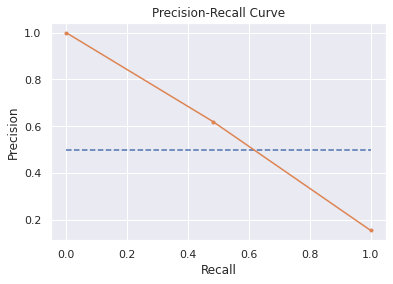

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(test_sentiments, lr_bow_predictions[:])
# Let's plot the Precision-Recall curve, precision on the y axis and recall on the x axis
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recalls, precisions, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')	
# show the plot
plt.show()

In [52]:
cm = metrics.confusion_matrix(y_true=test_sentiments, y_pred=lr_bow_predictions)
print(cm)                                  

[[14518   825]
 [ 1446  1345]]


In [38]:
highest_f1 = 0
threshold_highest_f1 = 0
for id, threhold in enumerate(thresholds):
    f1_score = 2*precisions[id]*recalls[id]/(precisions[id]+recalls[id])
    if(f1_score > highest_f1):
        highest_f1 = f1_score	
        threshold_highest_f1 = threhold
print("Highest F1:", highest_f1, ", Threshold for the highest F1:", threshold_highest_f1)

Highest F1: 0.5422293892360411 , Threshold for the highest F1: 1


In [54]:
%%time

# Logistic Regression model on TF-IDF features

# train model
lr.fit(tv_train_features, train_sentiments)

# predict on test data
lr_tfidf_predictions = lr.predict(tv_test_features)

CPU times: user 3.8 s, sys: 2.55 s, total: 6.36 s
Wall time: 3.25 s


In [55]:
get_metrics(test_sentiments,lr_bow_predictions)

Accuracy: 0.8748
Precision: 0.8648
Recall: 0.8748
F1 Score: 0.8682


## RANDOM FOREST

In [56]:
%%time

# Random Forest model on BOW features
from sklearn.ensemble import RandomForestClassifier

# instantiate model
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

# train model
rf.fit(cv_train_features, train_sentiments)

# predict on test data
rf_bow_predictions = rf.predict(cv_test_features)

CPU times: user 19min 2s, sys: 1.65 s, total: 19min 3s
Wall time: 9min 39s


In [57]:
get_metrics(test_sentiments,lr_bow_predictions)

Accuracy: 0.8748
Precision: 0.8648
Recall: 0.8748
F1 Score: 0.8682


## Random Forest model on TF-IDF features

In [0]:
# train model
rf.fit(tv_train_features, train_sentiments)

# predict on test data
rf_tfidf_predictions = rf.predict(tv_test_features)

In [59]:
get_metrics(test_sentiments,lr_bow_predictions)

Accuracy: 0.8748
Precision: 0.8648
Recall: 0.8748
F1 Score: 0.8682


##Deep Learning Models

In [60]:
import gensim
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [0]:
tokenized_train = [nltk.word_tokenize(text)
                       for text in dataset.new_text]

# build word2vec model
w2v_num_features = 512
w2v_model = gensim.models.Word2Vec(tokenized_train, size=w2v_num_features, window=150,
                                   min_count=10, sample=1e-3, workers=16)

In [0]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [0]:
# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(corpus=tokenized_train, model=w2v_model,
                                                     num_features=w2v_num_features)

In [0]:
# Read the test data (It doesn't have the human_tag label, we are trying to predict that :D )
test_df = pd.read_csv('/content/test.csv', encoding='utf-8', header=0)

In [0]:
# Fill missing text and title values
test_df['text'] = test_df['text'].fillna("")
test_df['title'] = test_df['title'].fillna("")

In [44]:
test_df['new_text'] = test_df[['text','title']].apply(lambda x: ':'.join(str(s) for s in x), axis=1)
test_df.head()

,ID,doc_id,text,date,star_rating,title,new_text
0,62199,15449606311,"Quality of material is great, however, the bac...",3/7/2018 19:47,3,great backpack with strange fit,"Quality of material is great, however, the bac..."
1,76123,15307152511,The product was okay but wasn't refined campho...,43135.875,2,Not refined,The product was okay but wasn't refined campho...
2,78742,12762748321,I normally read the reviews before buying some...,42997.37708,1,"Doesnt work, wouldnt recommend",I normally read the reviews before buying some...
3,64010,15936405041,These pads are completely worthless. The light...,43313.25417,1,The lighter colored side of the pads smells li...,These pads are completely worthless. The light...
4,17058,13596875291,The saw works great but the blade oiler does n...,12/5/2017 20:17,2,The saw works great but the blade oiler does n...,The saw works great but the blade oiler does n...


In [45]:
print("Pre-processing the Speech field with use of Lemmatization")
test_df.new_text = normalize_corpus(test_df.new_text.tolist()) 

Pre-processing the Speech field with use of Lemmatization


In [0]:
#Saving the df with all the stopwords removed
from google.colab import files
dataset.to_csv('Product_Safety_Amazon_test_df.csv') 
files.download('Product_Safety_Amazon_test_df.csv')

In [0]:
#Get TF-IDF feaures:
#X_test_title_vectors = tfidf_title_vectorizer.transform(X_test_title_processed)
tv_test_features = tv.transform(test_df.new_text)

In [0]:
# ------Test data -----------
# Normalize star rating
X_test_star_rating_norm = test_df["star_rating"] / test_df["star_rating"].max()
# Let's use the star rating and the tf-idf vectors together 
test_prediction_probs = lr.predict_proba(tv_test_features)[:, 1]

In [0]:
test_prediction = np.where(test_prediction_probs > threshold_highest_f1, 1, 0)

In [0]:
import pandas as pd
result_df = pd.DataFrame()
result_df["ID"] = test_df["ID"]
result_df["human_tag"] = test_prediction
result_df.to_csv("/content/project_day2_result.csv", encoding='utf-8', index=False)

In [86]:
predict = pd.read_csv("/content/project_day2_result.csv")
predict.tail(50)

,ID,human_tag
15734,8461,0
15735,35737,0
15736,41169,0
15737,43085,0
15738,35264,0
15739,58140,0
15740,77763,0
15741,68918,0
15742,2427,0
15743,61618,0
